In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max.columns', 100)
pd.set_option('float_format', '{:.2f}'.format)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
file_path = '/content/drive/MyDrive/ML_homework/Mid-term проєкт/bank-additional-full.csv.zip'

df = pd.read_csv(file_path, sep=';')

Перших 5 рядків набору даних

In [4]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no


Загальна інформація про DataFrame

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

Описова статистика для числових змінних

In [6]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00
mean,40.02,258.29,2.57,962.48,0.17,0.08,93.58,-40.50,3.62,5167.04
std,10.42,259.28,2.77,186.91,0.49,1.57,0.58,4.63,1.73,72.25
min,17.00,0.00,1.00,0.00,0.00,-3.40,92.20,-50.80,0.63,4963.60
25%,32.00,102.00,1.00,999.00,0.00,-1.80,93.08,-42.70,1.34,5099.10
50%,38.00,180.00,2.00,999.00,0.00,1.10,93.75,-41.80,4.86,5191.00
75%,47.00,319.00,3.00,999.00,0.00,1.40,93.99,-36.40,4.96,5228.10
max,98.00,4918.00,56.00,999.00,7.00,1.40,94.77,-26.90,5.04,5228.10


Перевірка розподілу цільової змінної y

In [7]:
print("Розподіл цільової змінної:")
print(df['y'].value_counts())
print("\n")

print("Розподіл цільової змінної y (%):")
print(df['y'].value_counts(normalize=True) * 100)

Розподіл цільової змінної:
y
no     36548
yes     4640
Name: count, dtype: int64


Розподіл цільової змінної y (%):
y
no    88.73
yes   11.27
Name: proportion, dtype: float64


Цільова змінна є сильно незбалансованою

In [8]:
cat_columns = df.select_dtypes(include='object').columns

In [9]:
cat_columns.to_list()

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome',
 'y']

In [10]:
def bi_cat_countplot(df, column, hue_column):
    fig, axes = plt.subplots(nrows=1, ncols=3)
    fig.set_size_inches(21, 6)

    # --- Графік 1: Нормалізований розподіл ---
    pltname = f'Нормалізований розподіл {column} за категорією: {hue_column}'
    proportions = df.groupby(hue_column)[column].value_counts(normalize=True)
    proportions = (proportions * 100).round(2)

    if not proportions.empty:
        ax1 = proportions.unstack(hue_column).sort_index().plot.bar(
            ax=axes[0], title=pltname, rot=45
        )
        for container in ax1.containers:
            ax1.bar_label(container, fmt='{:,.1f}%')
        ax1.legend(title=hue_column)

    # --- Графік 2: Абсолютна кількість ---
    pltname = f'Кількість даних за категорією: {column}'
    counts = df.groupby(hue_column)[column].value_counts()

    if not counts.empty:
        ax2 = counts.unstack(hue_column).sort_index().plot.bar(
            ax=axes[1], title=pltname, rot=45
        )
        for container in ax2.containers:
            ax2.bar_label(container)
        ax2.legend(title=hue_column)

    # --- Графік 3: Розподіл Hue всередині Column ---
    pltname = f'Розподіл {hue_column} (у %) за категорією: {column}'
    proportions_target = df.groupby(column)[hue_column].value_counts(normalize=True)
    proportions_target = (proportions_target * 100).round(2)

    if not proportions_target.empty:
        ax3 = proportions_target.unstack(hue_column).sort_index().plot.bar(
            ax=axes[2], title=pltname, stacked=True, rot=45
        )

        for container in ax3.containers:
            ax3.bar_label(container, fmt='{:,.1f}%', label_type='center')

        ax3.legend(title=hue_column, bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.tight_layout()
    plt.show()

def uni_cat_target_compare(df, column):
    bi_cat_countplot(df, column, hue_column='y')

In [11]:
df.job.value_counts()

,count
job,
admin.,10422
blue-collar,9254
technician,6743
services,3969
management,2924
retired,1720
entrepreneur,1456
self-employed,1421
housemaid,1060


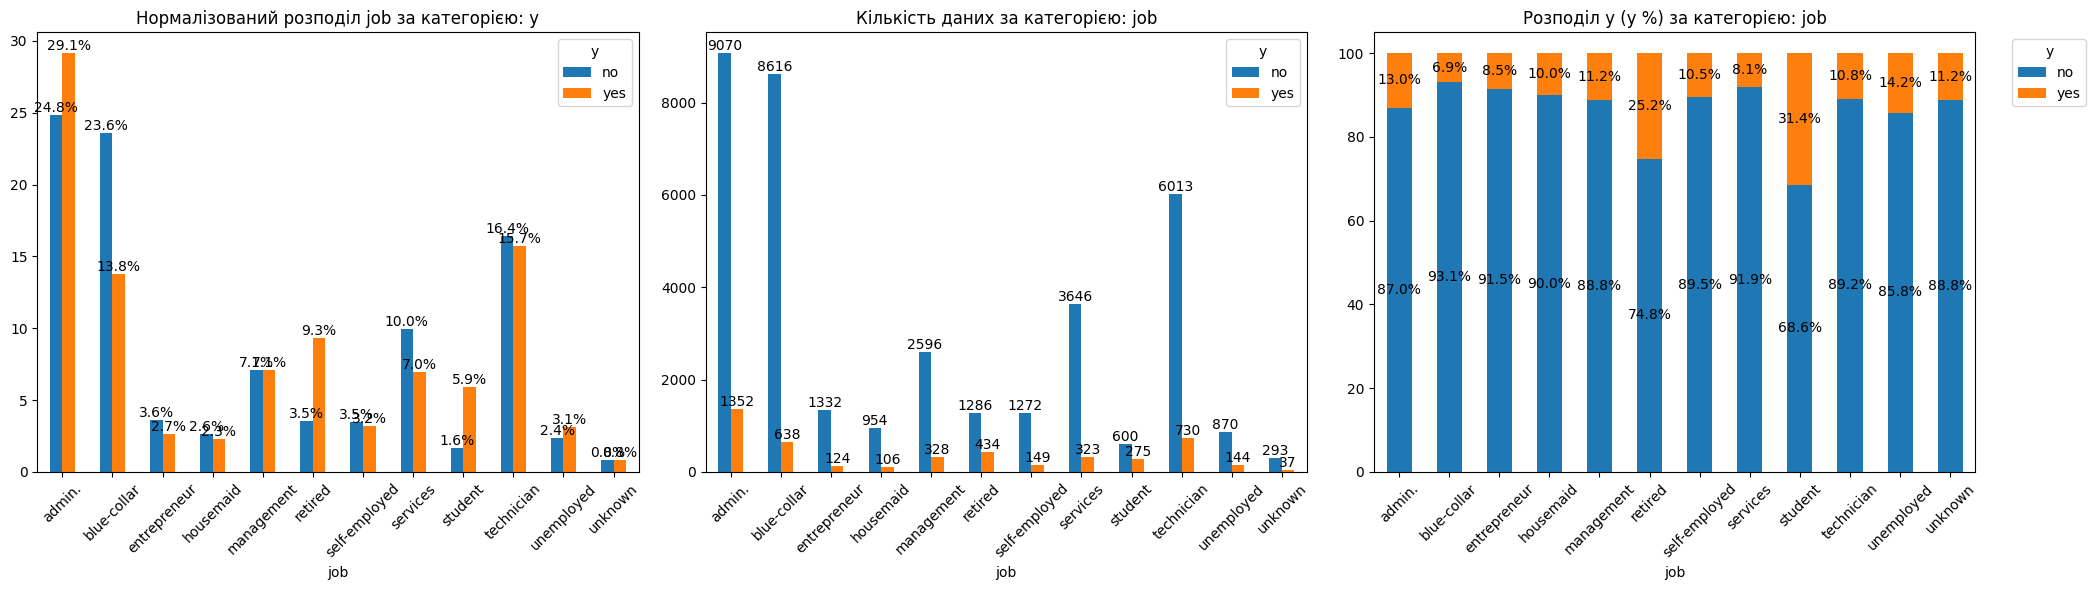

In [12]:
uni_cat_target_compare(df, 'job')

In [13]:
df.marital.value_counts()

,count
marital,
married,24928
single,11568
divorced,4612
unknown,80


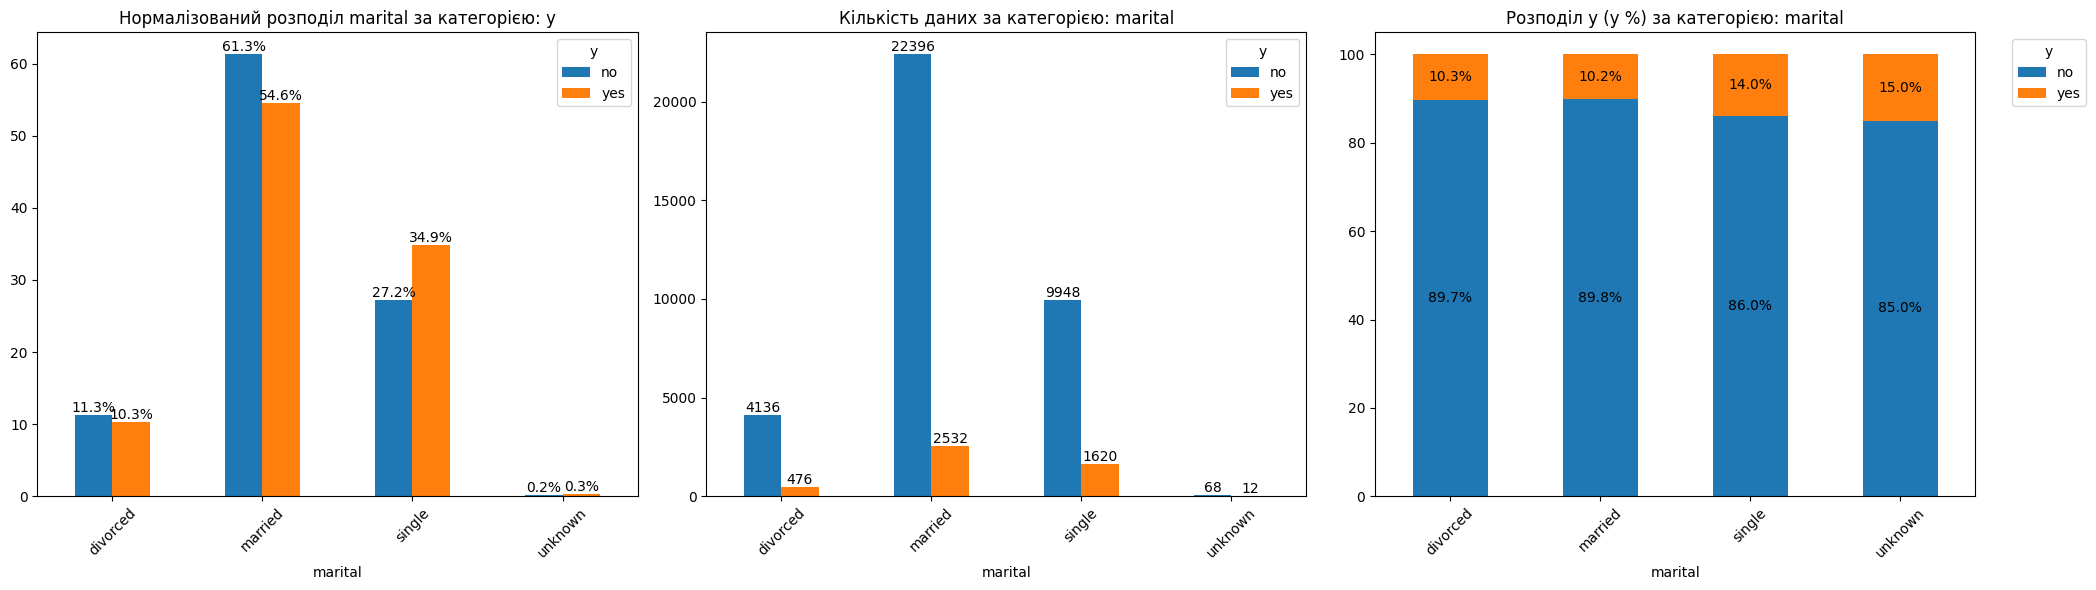

In [14]:
uni_cat_target_compare(df, 'marital')

In [15]:
df.education.value_counts()

,count
education,
university.degree,12168
high.school,9515
basic.9y,6045
professional.course,5243
basic.4y,4176
basic.6y,2292
unknown,1731
illiterate,18


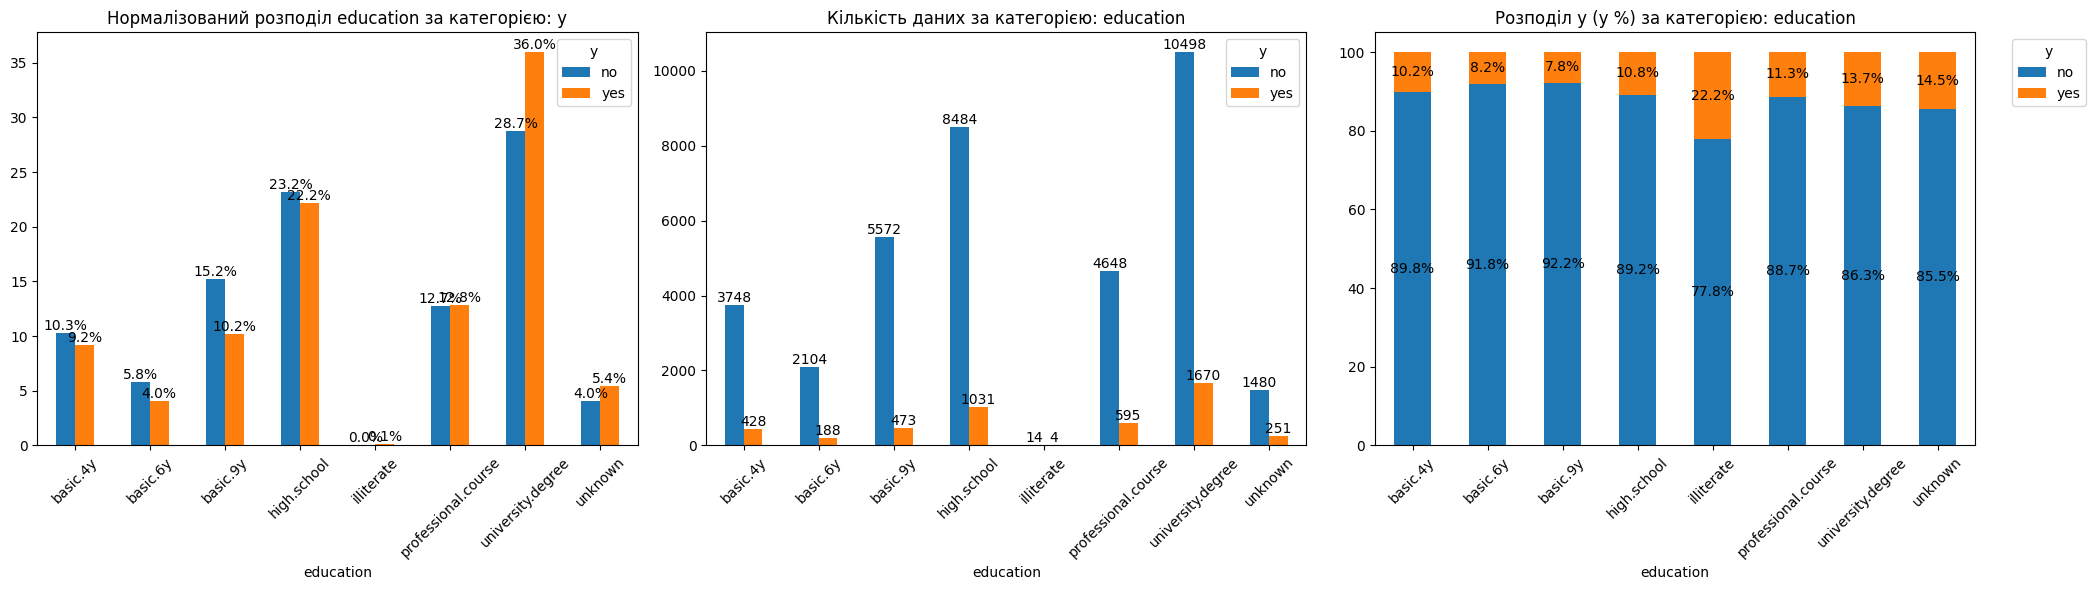

In [16]:
uni_cat_target_compare(df, 'education')

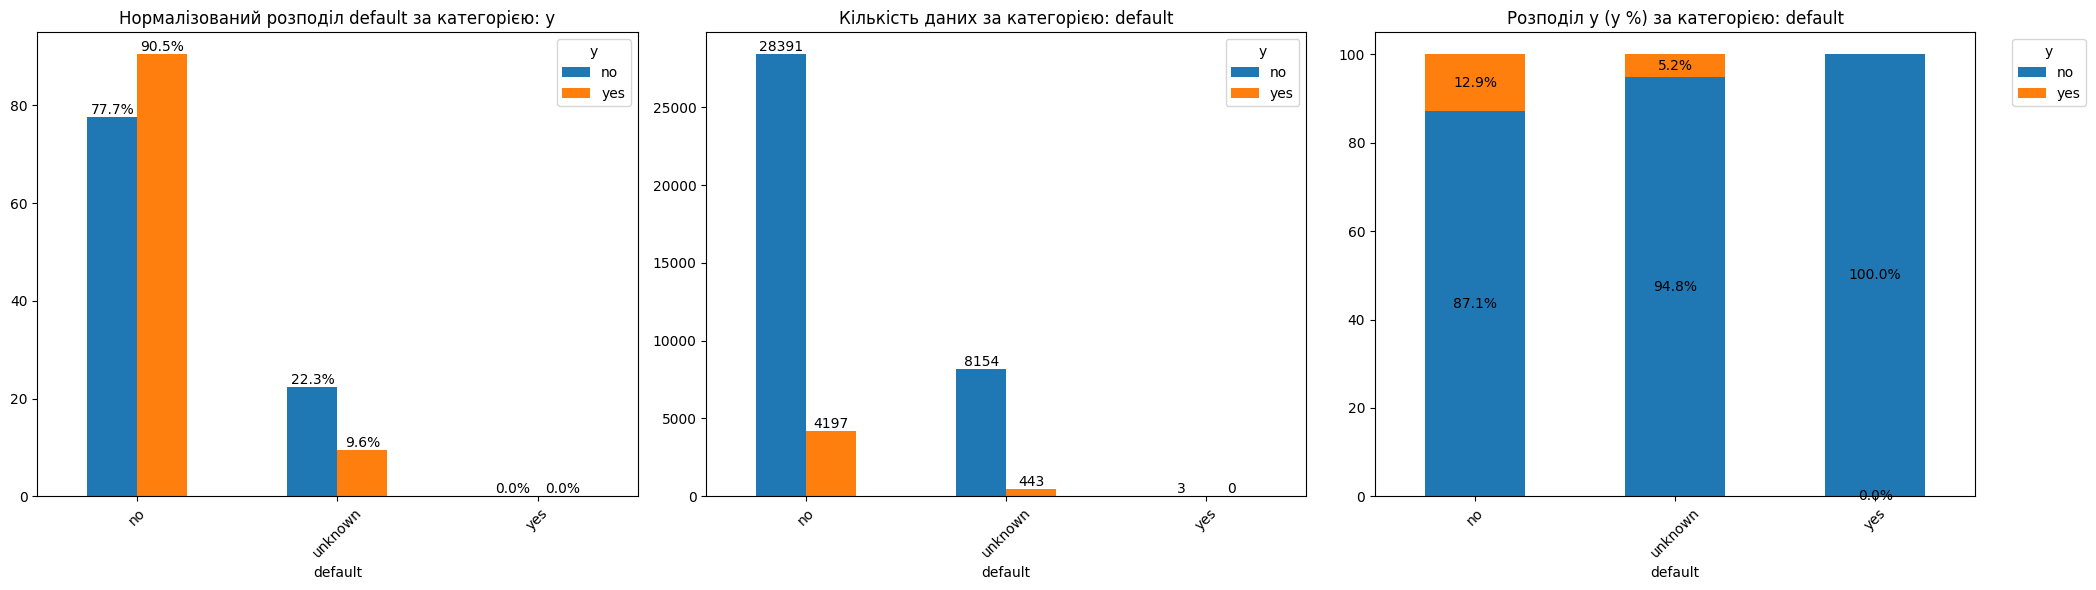

In [17]:
uni_cat_target_compare(df, 'default')

In [18]:
df.housing.value_counts()

,count
housing,
yes,21576
no,18622
unknown,990


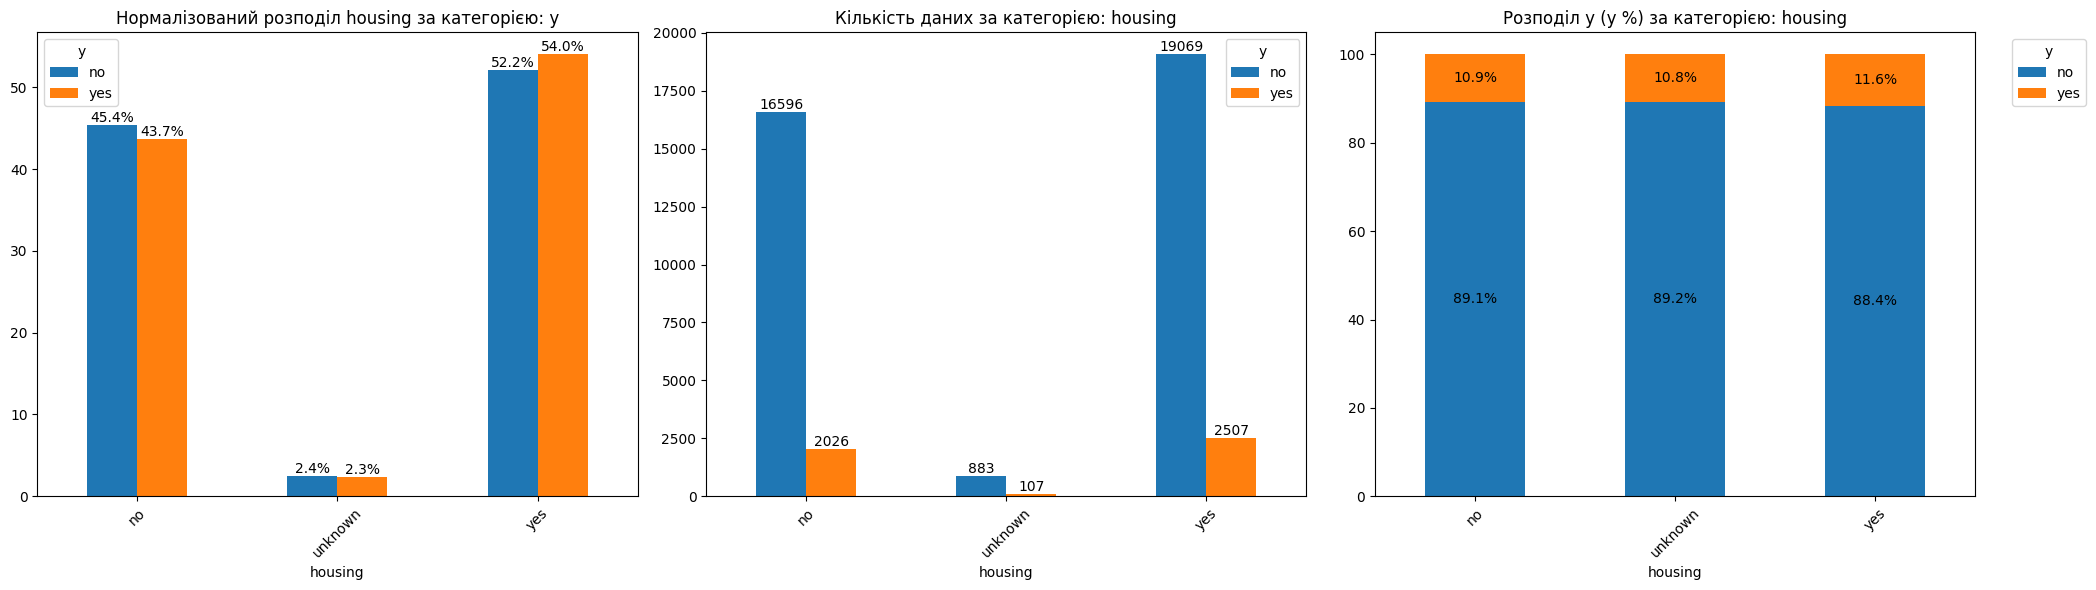

In [19]:
uni_cat_target_compare(df, 'housing')

In [20]:
df.loan.value_counts()

,count
loan,
no,33950
yes,6248
unknown,990


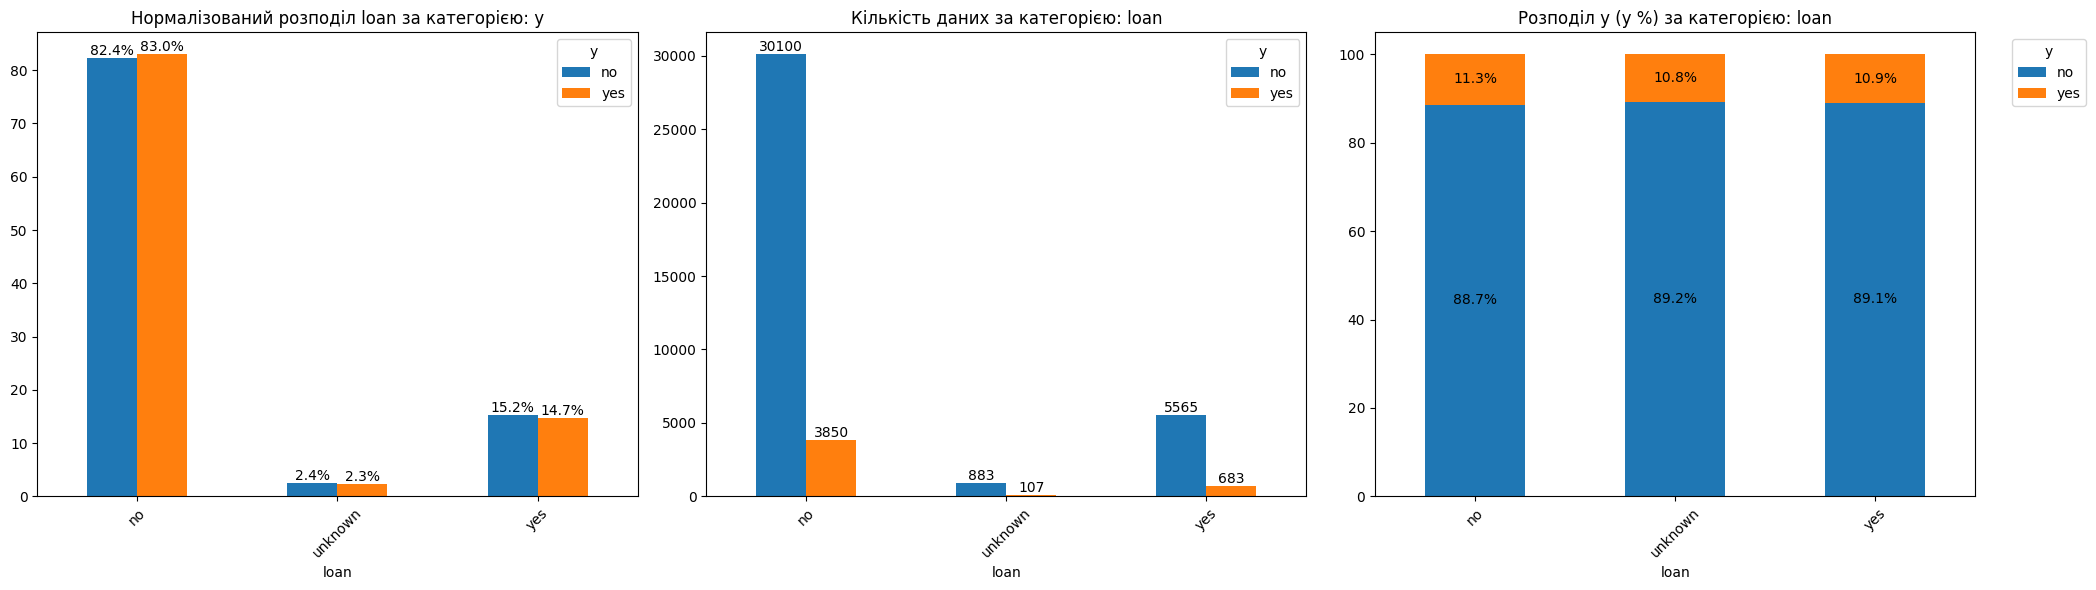

In [21]:
uni_cat_target_compare(df, 'loan')

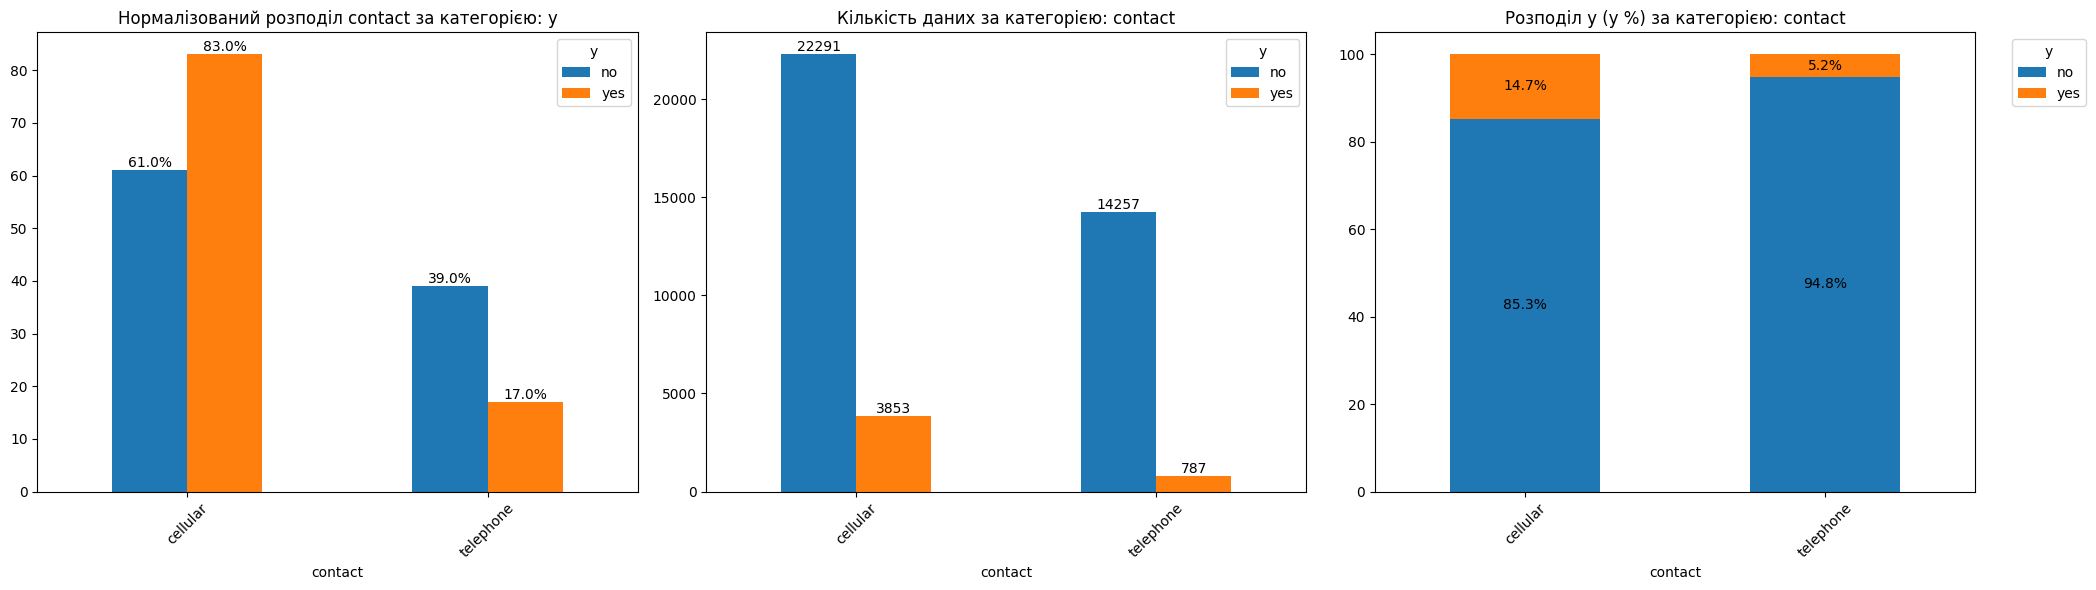

In [22]:
uni_cat_target_compare(df, 'contact')

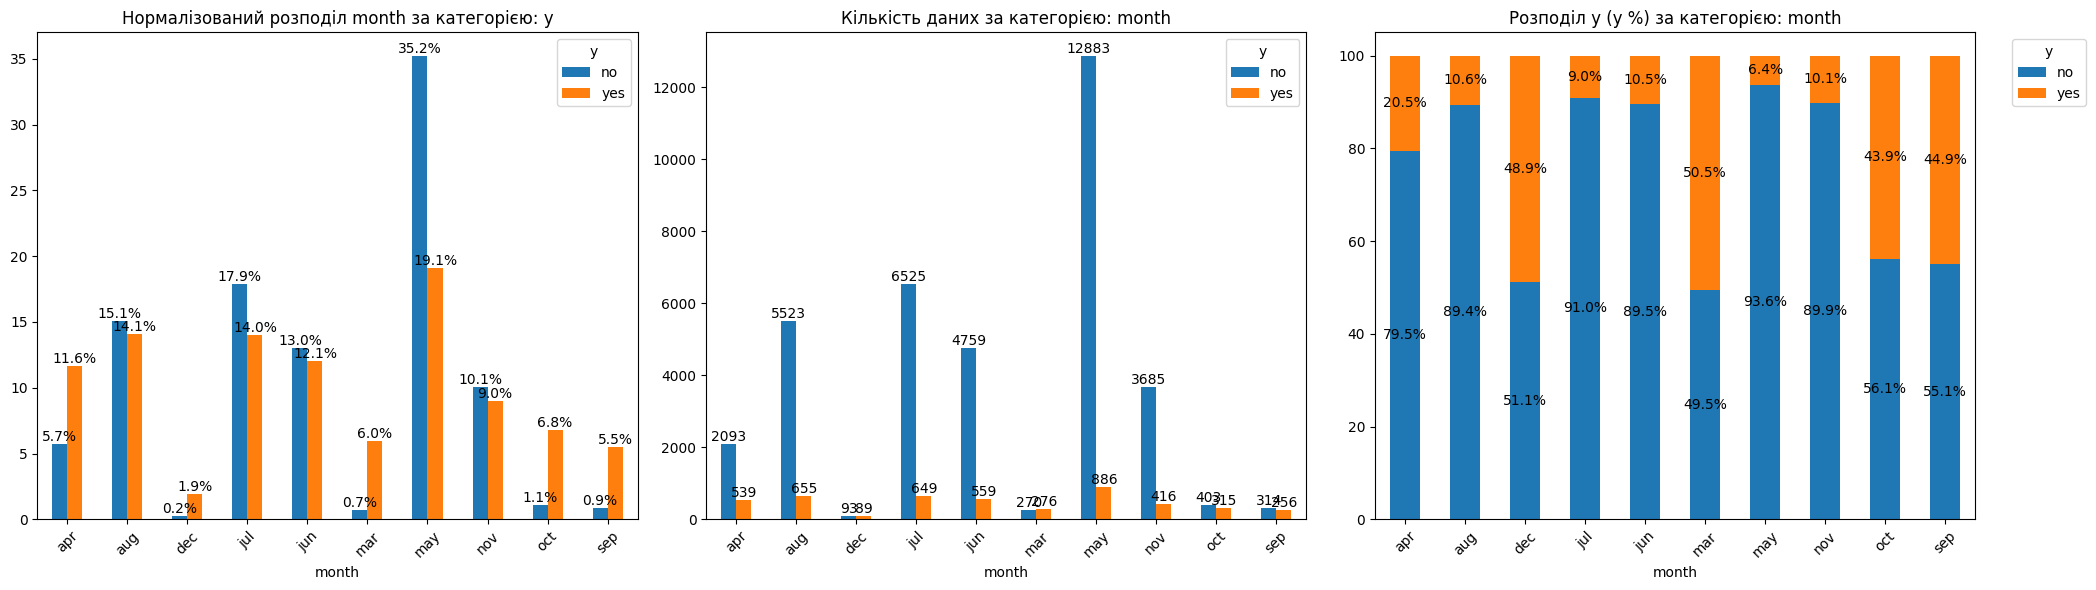

In [23]:
uni_cat_target_compare(df, 'month')

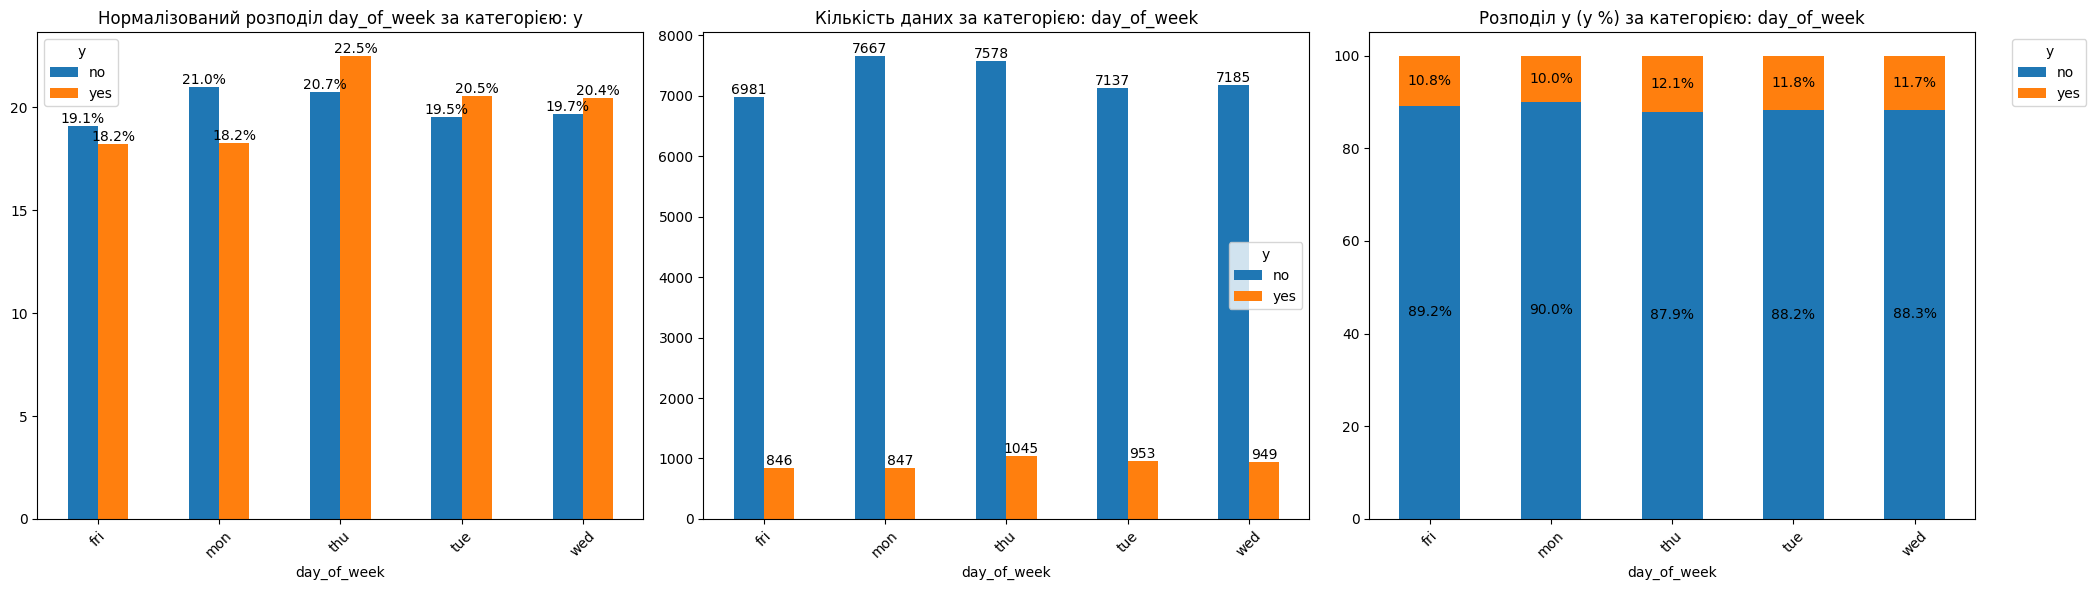

In [24]:
uni_cat_target_compare(df, 'day_of_week')

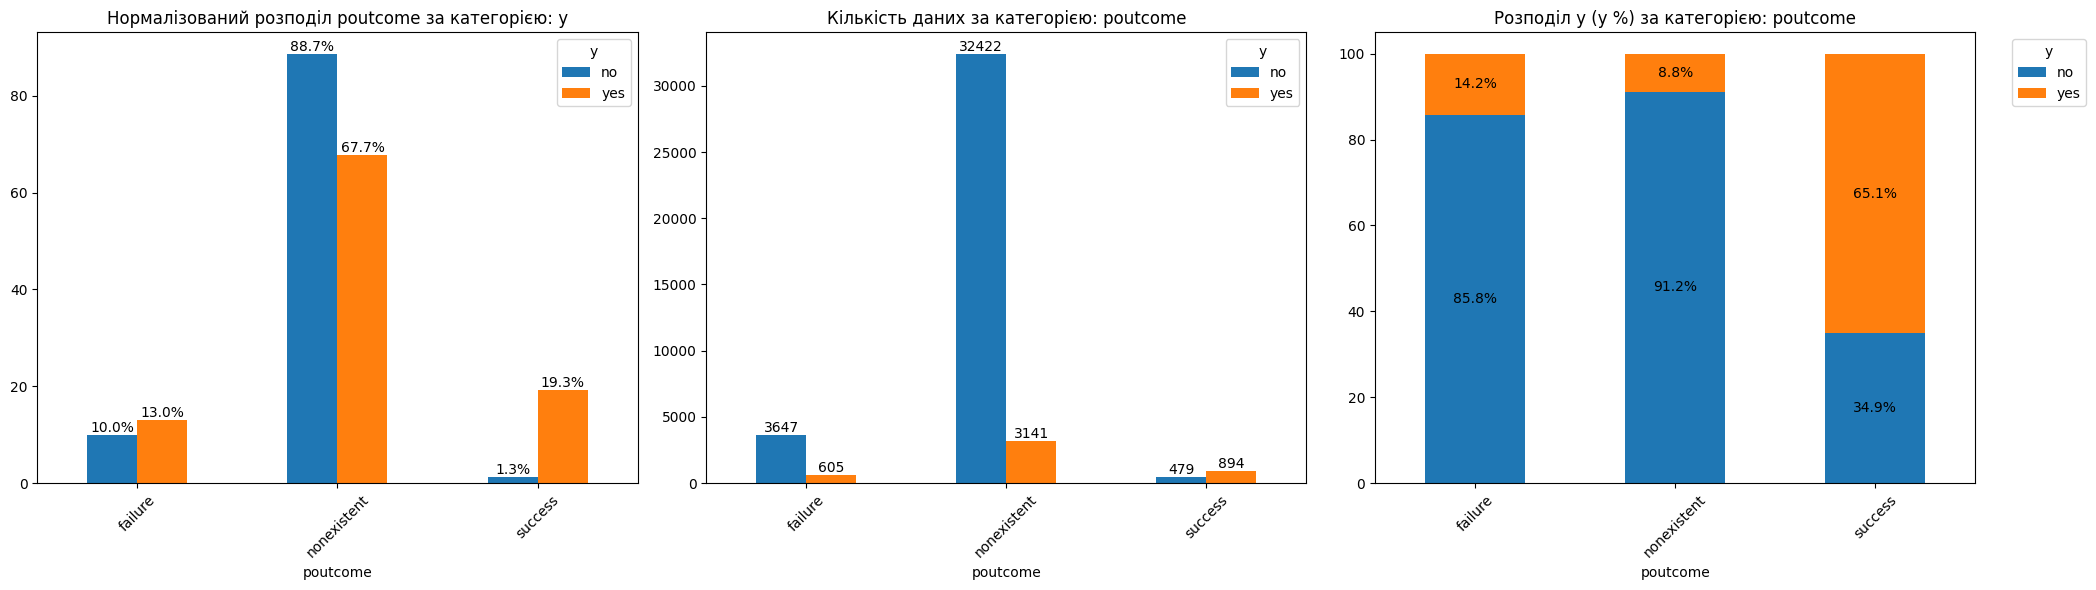

In [25]:
uni_cat_target_compare(df, 'poutcome')

# Аналіз числових змінних

In [26]:
num_columns = df.select_dtypes(exclude='object').columns

num_columns.to_list()

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

In [27]:
df0 = df[df['y']=='no']
df1 = df[df['y']=='yes']

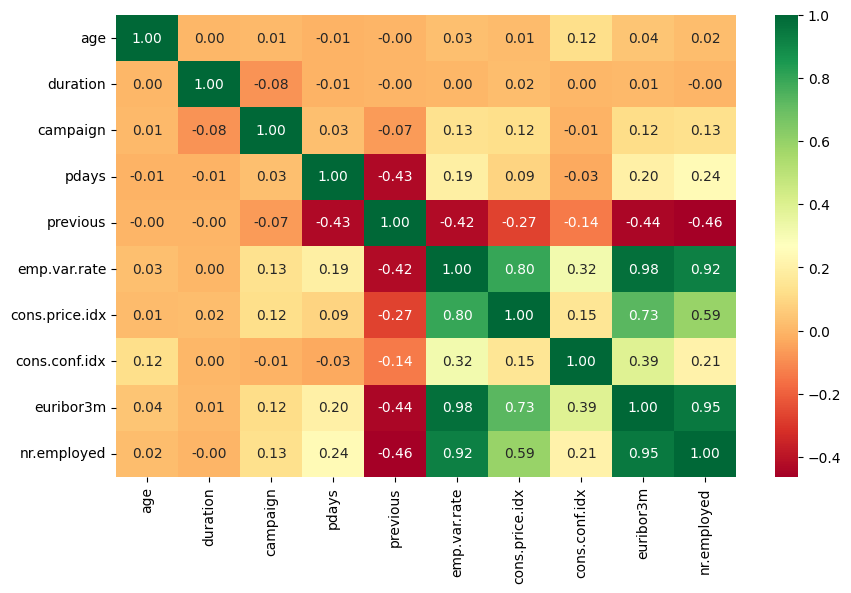

In [28]:
plt.figure(figsize = (10, 6))
sns.heatmap(data = df0[num_columns].corr(), annot = True, cmap = "RdYlGn", cbar = True, fmt='.2f')
plt.show()

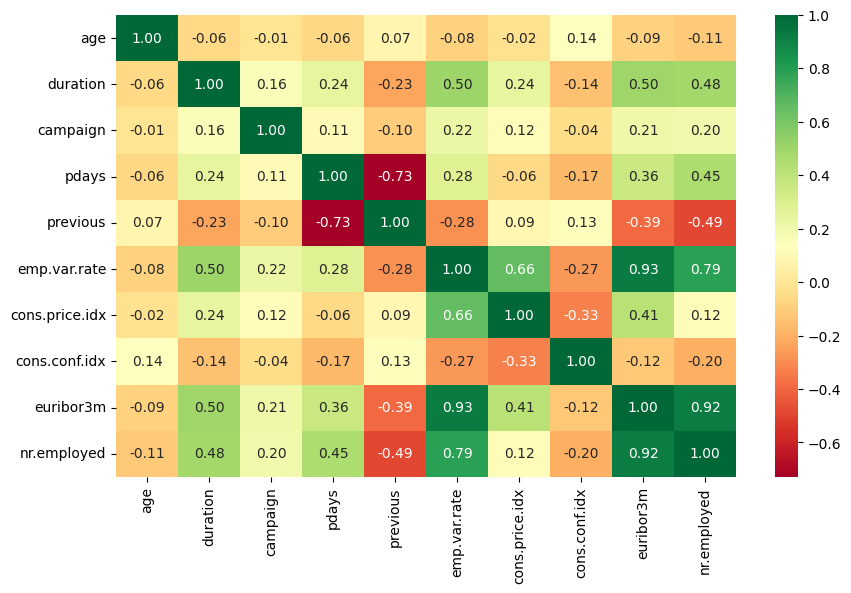

In [29]:
plt.figure(figsize = (10, 6))
sns.heatmap(data = df1[num_columns].corr(), annot = True, cmap = "RdYlGn", cbar = True, fmt='.2f')
plt.show()

In [30]:
def outliers_kde_boxplot(df0, df1, column):

    Q1_df0 = df0[column].quantile(0.25)
    Q3_df0 = df0[column].quantile(0.75)
    Q1_df1 = df1[column].quantile(0.25)
    Q3_df1 = df1[column].quantile(0.75)
    IQR_df0 = Q3_df0 - Q1_df0
    IQR_df1 = Q3_df1 - Q1_df1

    Max_value_df0 = (Q3_df0 + 1.5 * IQR_df0)
    Max_value_df1 = (Q3_df1 + 1.5 * IQR_df1)

    fig, axes = plt.subplots(1, 2, figsize=(18, 6))

    # KDE Plot
    sns.kdeplot(data=df1[df1[column] <= Max_value_df1], x=column,
                label='Підписали депозит', ax=axes[0], color='green')
    sns.kdeplot(data=df0[df0[column] <= Max_value_df0], x=column,
                label='Не підписали депозит', ax=axes[0], color='orange')

    axes[0].set_title(f'Розподіл "{column}" (без викидів)')
    axes[0].ticklabel_format(style='plain', axis='x')
    axes[0].legend()
    axes[0].tick_params(axis='x', rotation=45)

    # Boxplot
    data_to_plot = pd.concat([
        df0[[column]].assign(Status='Не підписали'),
        df1[[column]].assign(Status='Підписали')
    ])

    sns.boxplot(data=data_to_plot, hue='Status', x='Status', y=column, ax=axes[1], palette=['orange', 'green'])

    axes[1].set_title(f'Boxplot "{column}" (аналіз викидів)')
    axes[1].ticklabel_format(style='plain', axis='y')

    plt.tight_layout()
    plt.show()

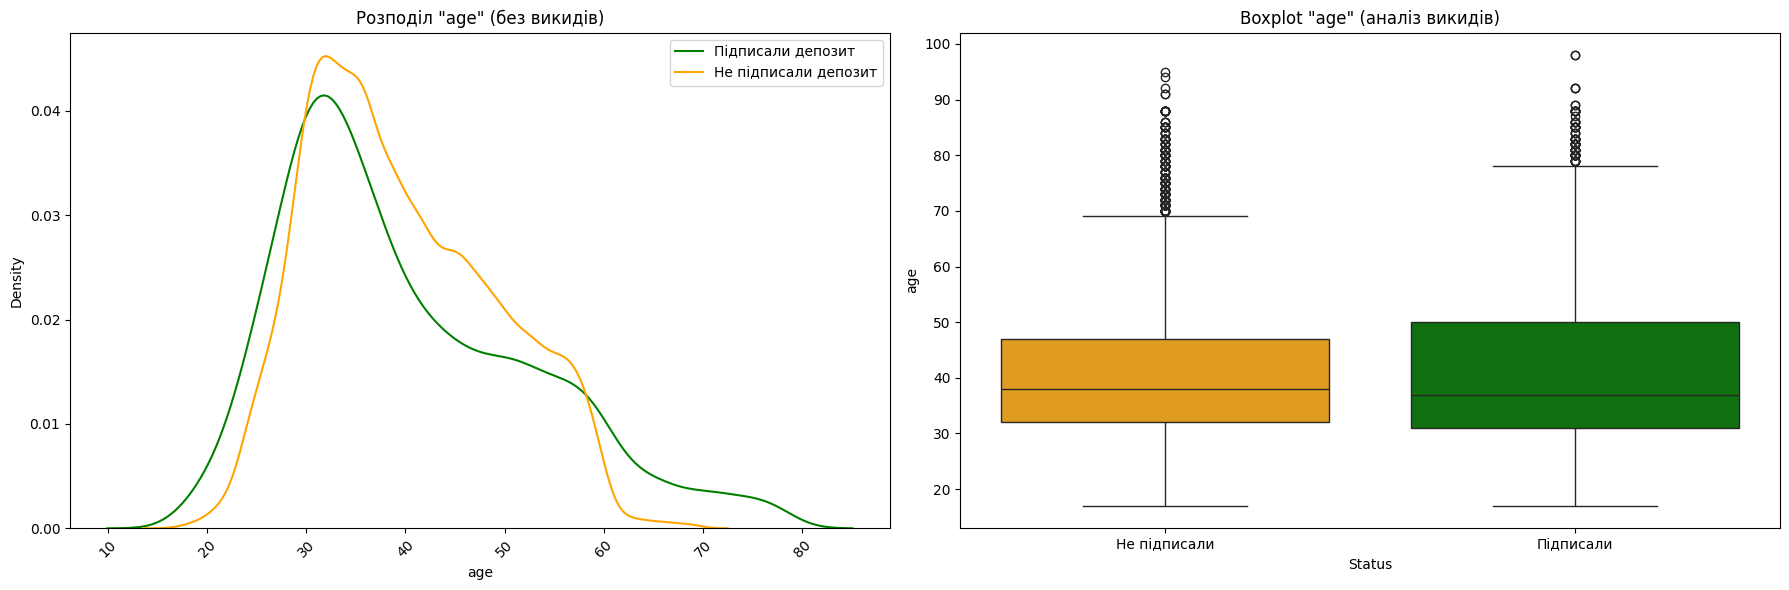

In [31]:
outliers_kde_boxplot(df0, df1, 'age')

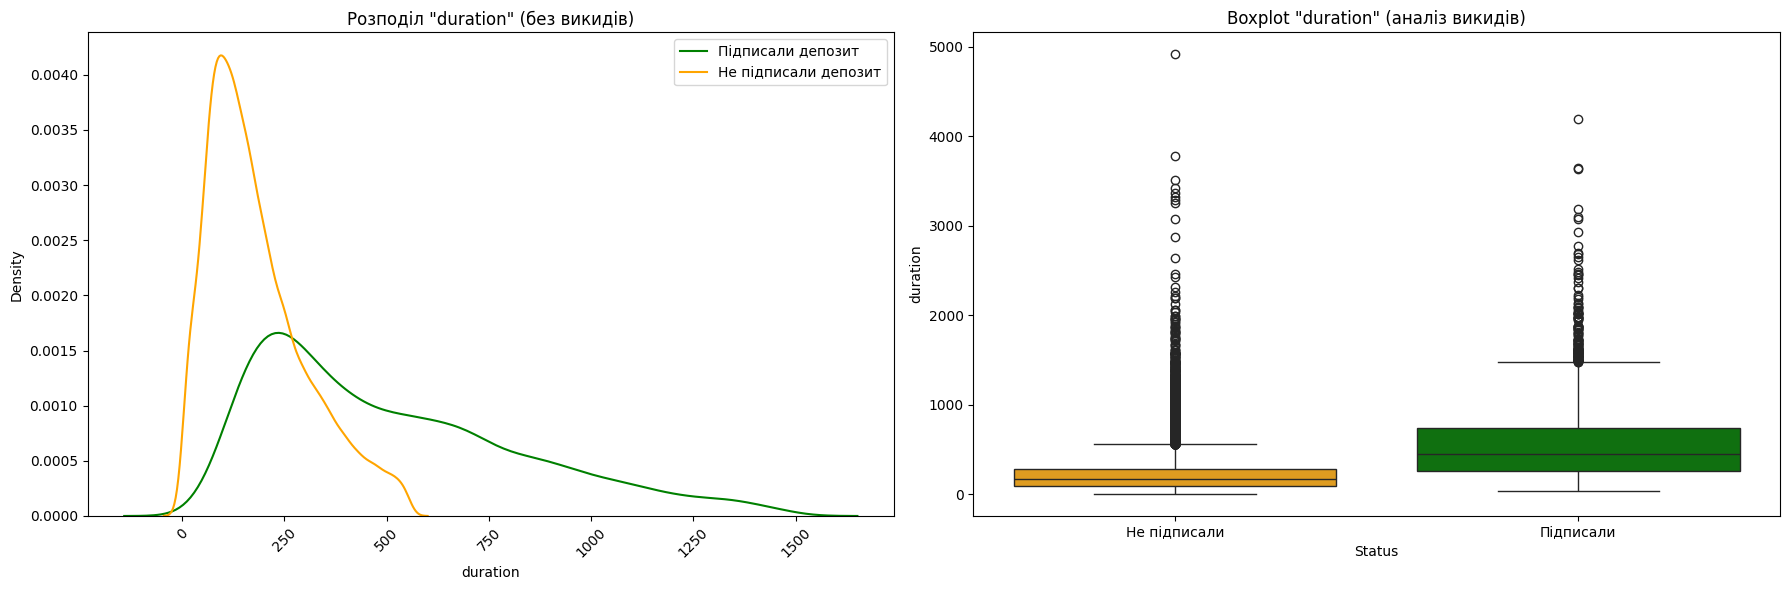

In [32]:
outliers_kde_boxplot(df0, df1, 'duration')

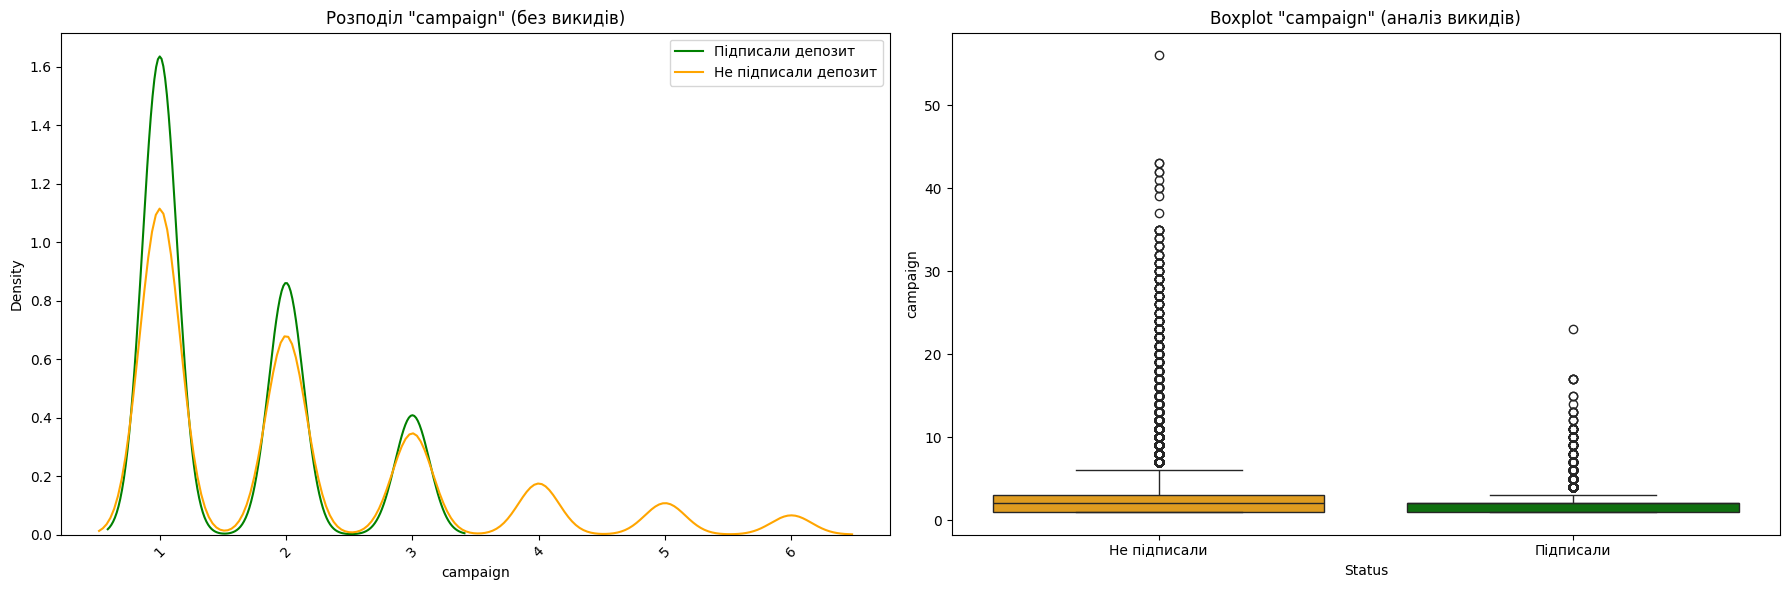

In [33]:
outliers_kde_boxplot(df0, df1, 'campaign')

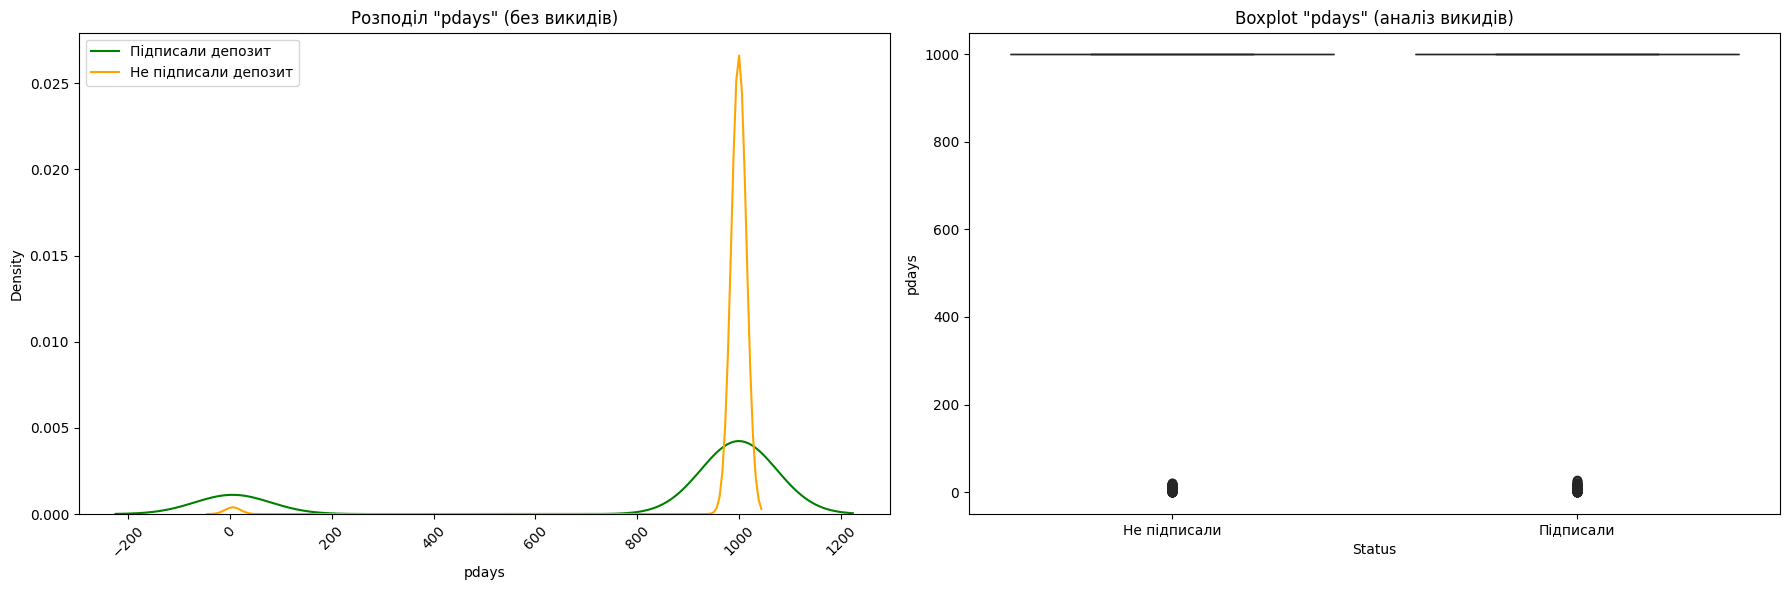

In [34]:
outliers_kde_boxplot(df0, df1, 'pdays')

/tmp/ipython-input-2444051194.py:18: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df0[df0[column] <= Max_value_df0], x=column,


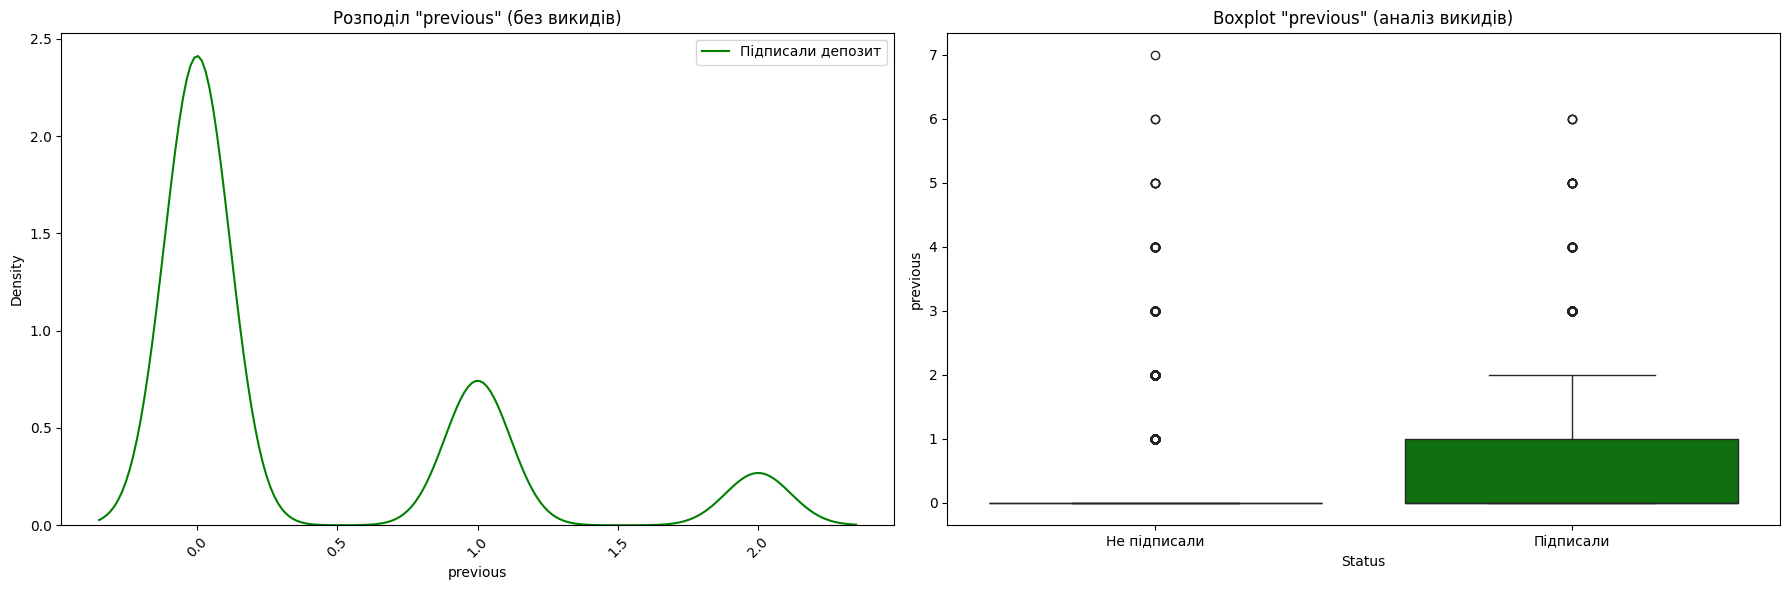

In [35]:
outliers_kde_boxplot(df0, df1, 'previous')

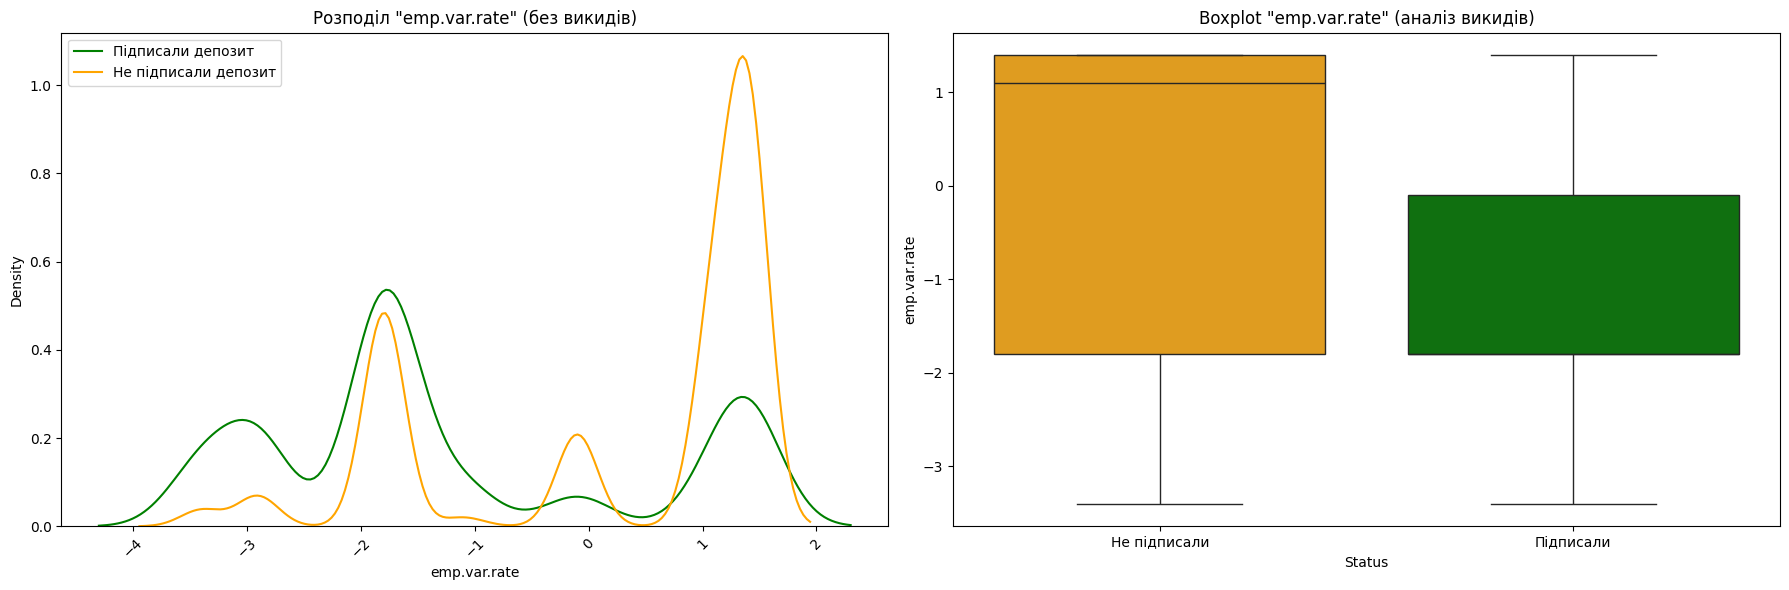

In [36]:
outliers_kde_boxplot(df0, df1, 'emp.var.rate')

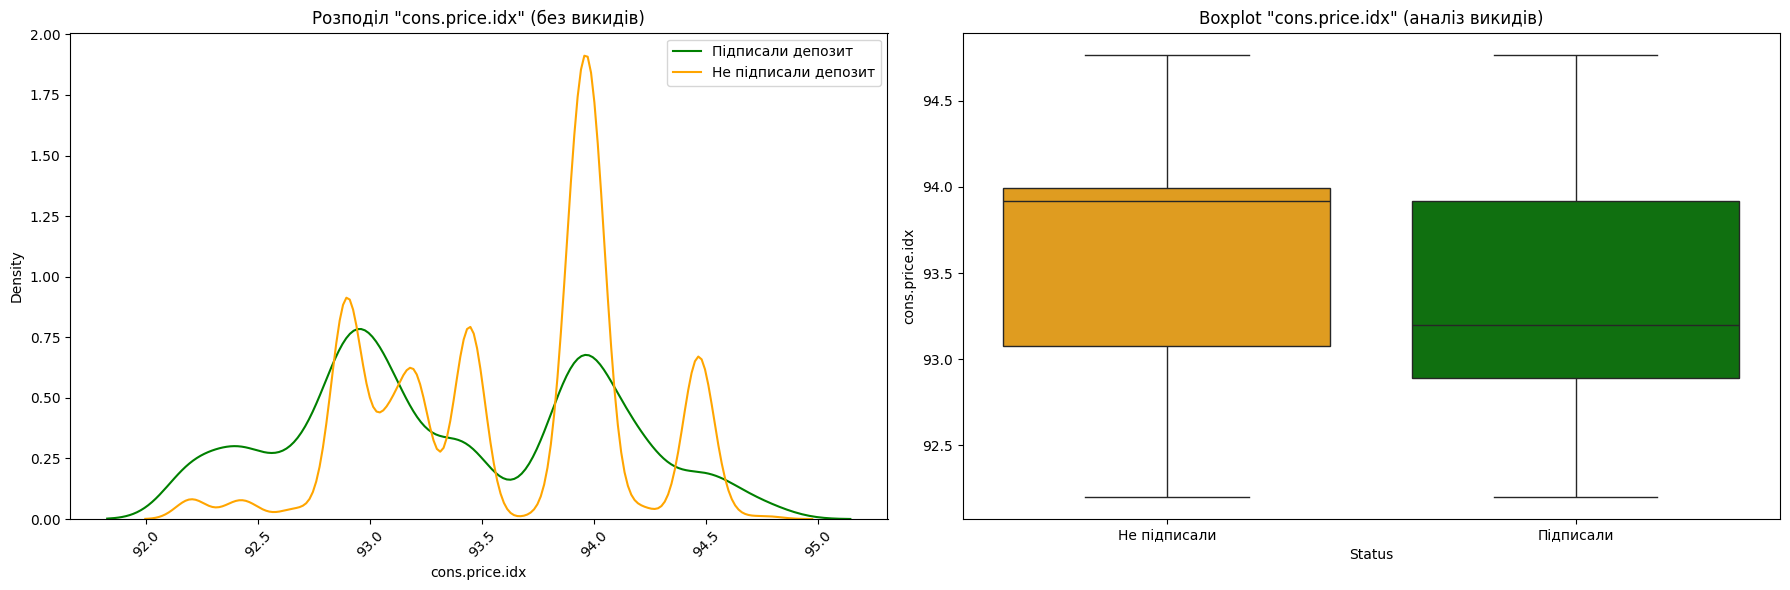

In [37]:
outliers_kde_boxplot(df0, df1, 'cons.price.idx')

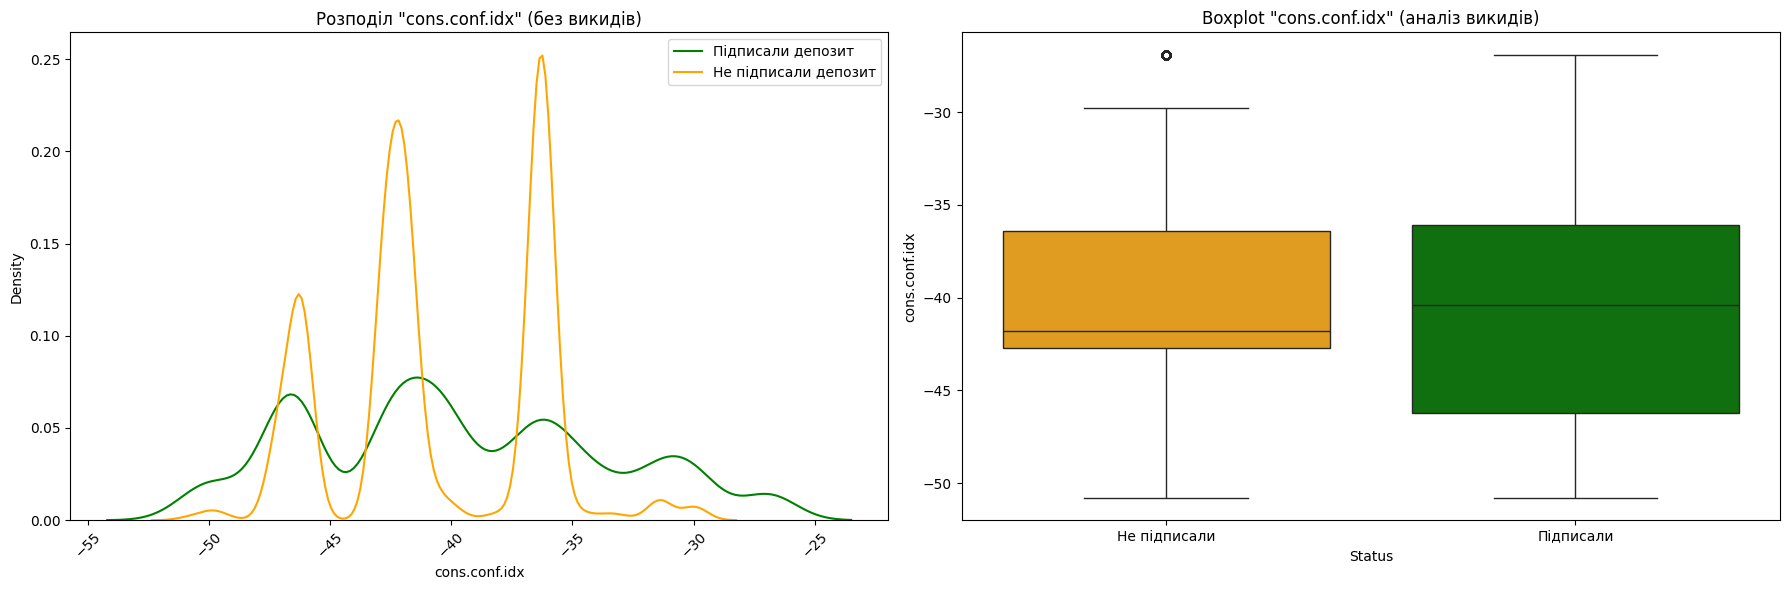

In [38]:
outliers_kde_boxplot(df0, df1, 'cons.conf.idx')

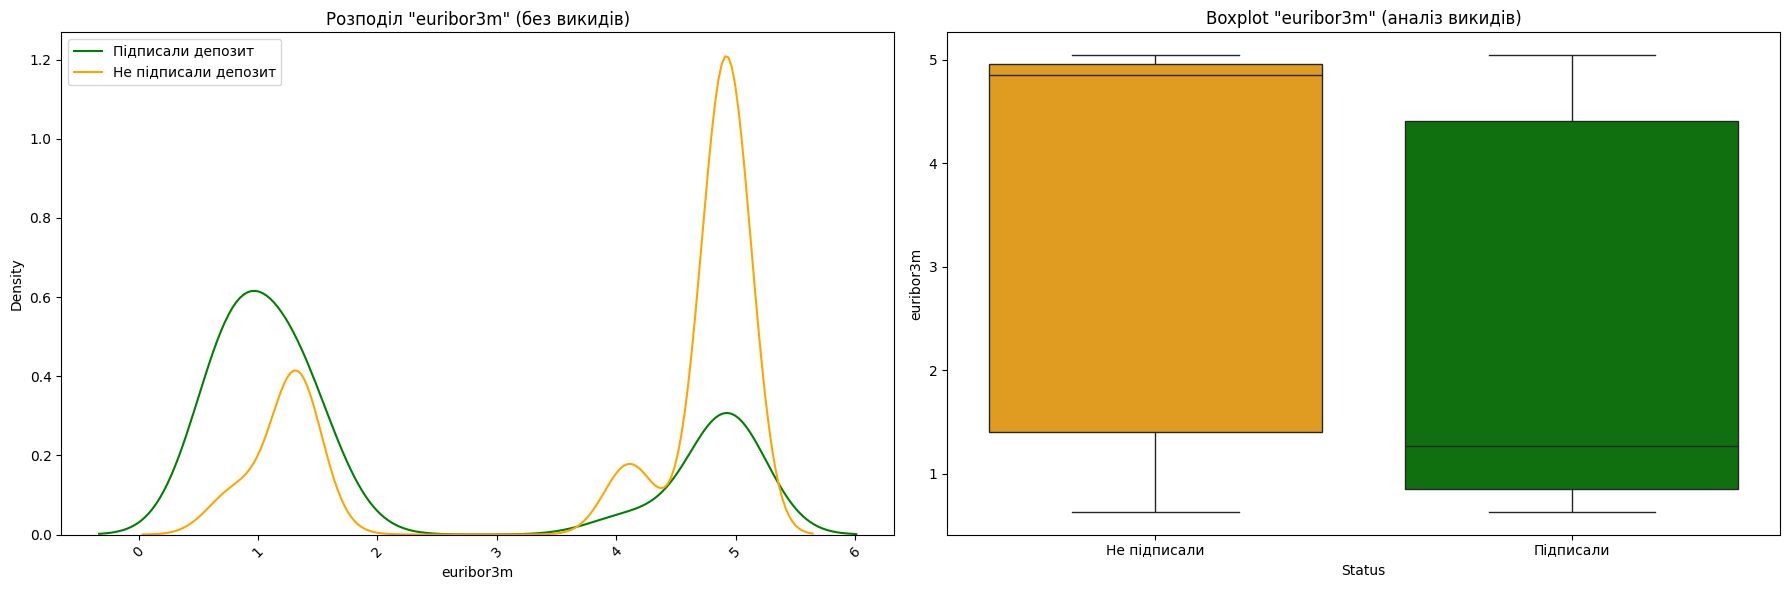

In [39]:
outliers_kde_boxplot(df0, df1, 'euribor3m')

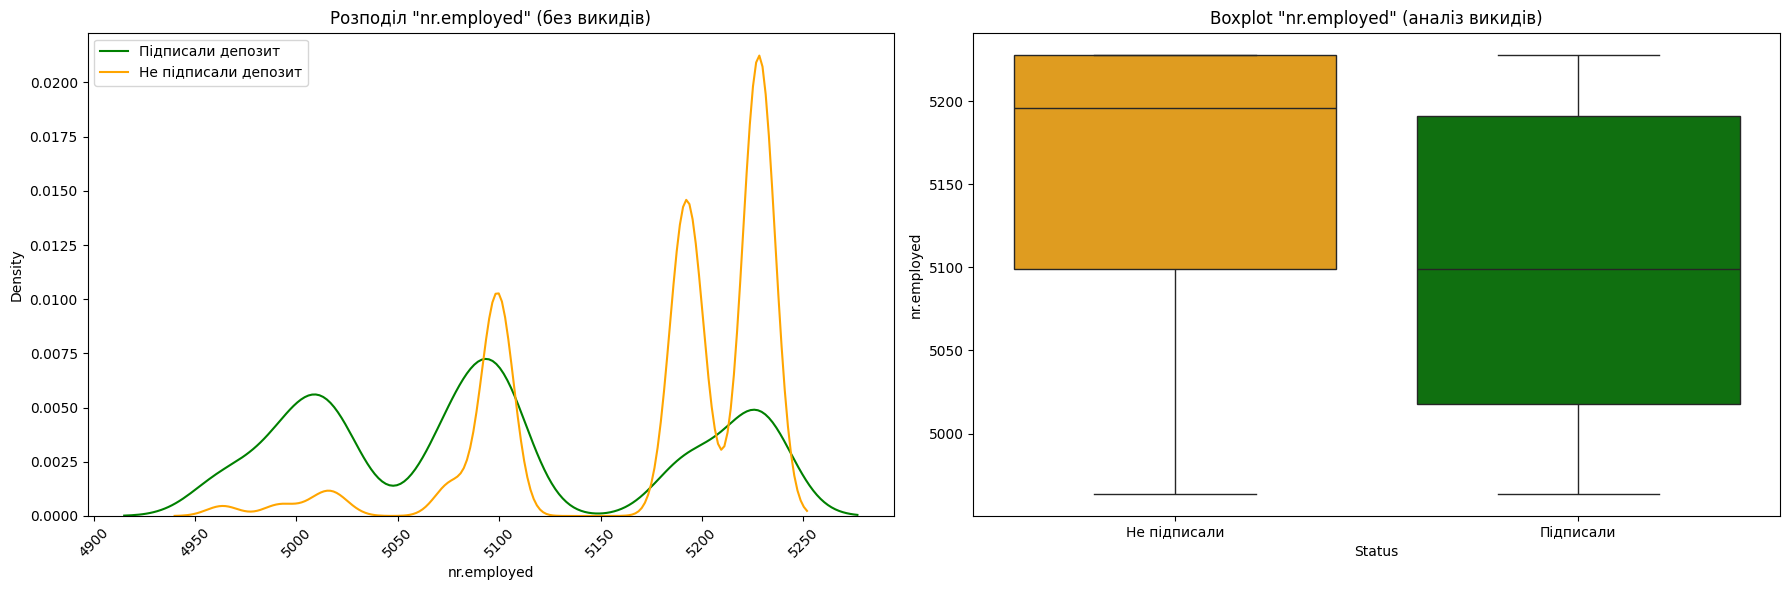

In [40]:
outliers_kde_boxplot(df0, df1, 'nr.employed')

На основі проведеного аналізу можна зробити певні висновки:



1. Клієнти віку (60+) та молодь (до 30) більш схильні погоджуватися на депозит, ніж клієнти середнього віку (30-50)
2. Тривалість дзвінка добре корелює з підписанням. Якщо клієнт не кинув слухавку в перші хвилини, то шанси зростають
3. Соціальний статус сильно впливає на рішення. Студенти та пенсіонери є найбільш цільовою аудиторією. Клієнти з вищою освітою також більш схильні до згоди.
4. Існує певна сезонність. Кампанії, проведені у березні, грудні, вересні та жовтні мали високий відсоток підписання, тоді як у травні він був найнижчим.
5. Результат попередньої кампанії (poutcome): Це дуже сильний предиктор. Якщо попередня кампанія була успішною (success), ймовірність підписки у поточній кампанії складає майже 65%! Якщо була невдалою (failure) або не існувала (nonexistent), шанси значно нижчі.
6. Клієнти, з якими вже контактували в рамках попередніх кампаній (де pdays < 999), мають вищий відсоток підписок порівняно з тими, з ким раніше не контактували (pdays = 999).
